<a href="https://colab.research.google.com/github/ArianIR77/StrokePredictionAI/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction


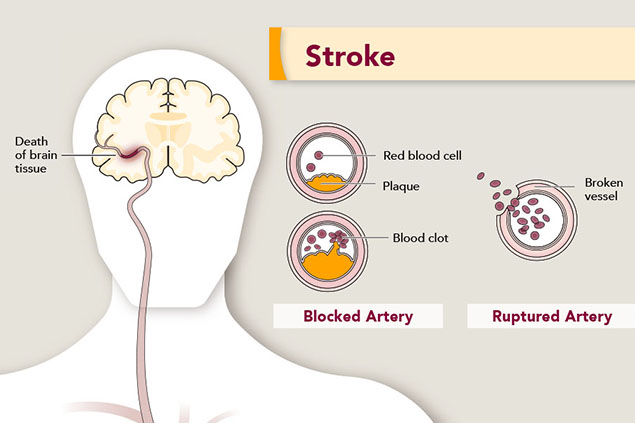

**Issue Overview:**

The World Health Organization identifies stroke as the world's second major cause of death, accounting for around 11% of all fatalities. Globally, strokes are becoming more prevalent due to lifestyle shifts that neglect wellness and proper nutrition. Consequently, the advent of modern electronic gadgets that monitor vital health statistics has opened avenues for developing automated systems anchored in artificial intelligence. In line with endeavors to forecast heart conditions, initiatives are underway to develop laboratory assessments that can anticipate the occurrence of a stroke. The dataset provided offers insight into patients' lifestyles, offering a chance to devise an AI-driven resolution for stroke prediction.

**Objective**:

The goal is to determine the likelihood of a patient experiencing a stroke. This entails a binary classification task that involves analyzing a variety of both numerical and categorical attributes.

**Dataset Attributes:**



*   id : unique identifier
*   gender : "Male", "Female" or "Other"
*   age : age of the patient
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*   heart_disease : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*   ever_married : "No" or "Yes"
*   work_type : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   Residence_type : "Rural" or "Urban"
*   avg_glucose_level : average glucose level in blood

*   bmi : body mass index

*   smoking_status : "formerly smoked", "never smoked", "smokes" or "Unknown"*

*   stroke : 1 if the patient had a stroke or 0 if not



















In [ ]:
# connect kaggle to colab notebook
from google.colab import files
files.upload()
""

Saving kaggle.json to kaggle.json


''

In [ ]:
# install kaggle api
!pip install -q kaggle

In [ ]:
#setting up kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# creating and changing the current directory

!mkdir Stroke_Prediction_dataset
%cd Stroke_Prediction_dataset

/content/Stroke_Prediction_dataset


In [ ]:
# searching for dataset
!kaggle datasets list -s Stroke



ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
fedesoriano/stroke-prediction-dataset                               Stroke Prediction Dataset                            67KB  2021-01-26 19:29:28         157101       2856  1.0              
jillanisofttech/brain-stroke-dataset                                Brain Stroke Dataset                                 47KB  2022-08-04 18:02:56          11167        146  1.0              
teamincribo/stroke-prediction                                       Stroke Prediction                                   628KB  2023-10-23 07:19:43           1672         32  0.9411765        
zzettrkalpakbal/full-filled-brain-stroke

In [ ]:
#downloading the dataset
!kaggle datasets download fedesoriano/stroke-prediction-dataset
%cd ..

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 49.9MB/s]
/content


In [ ]:
!unzip Stroke_Prediction_dataset/stroke-prediction-dataset.zip -d Stroke_Prediction_dataset
!rm Stroke_Prediction_dataset/stroke-prediction-dataset.zip

Archive:  Stroke_Prediction_dataset/stroke-prediction-dataset.zip
  inflating: Stroke_Prediction_dataset/healthcare-dataset-stroke-data.csv  


## Import the Necessary Libraries :


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("Stroke_Prediction_dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5109 non-null   int64  
 1   age                  5109 non-null   float64
 2   hypertension         5109 non-null   int64  
 3   heart_disease        5109 non-null   int64  
 4   avg_glucose_level    5109 non-null   float64
 5   bmi                  4908 non-null   float64
 6   stroke               5109 non-null   int64  
 7   ohe_Male             5109 non-null   uint8  
 8   ohe_Yes              5109 non-null   uint8  
 9   ohe_Never_worked     5109 non-null   uint8  
 10  ohe_Private          5109 non-null   uint8  
 11  ohe_Self-employed    5109 non-null   uint8  
 12  ohe_children         5109 non-null   uint8  
 13  ohe_Urban            5109 non-null   uint8  
 14  ohe_formerly smoked  5109 non-null   uint8  
 15  ohe_never smoked     5109 non-null   u

# Exploratory Data Analysis

### Understanding Data Structure:

In [ ]:
def dataset_overview(df):
    """
    Provides an overview of the given DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.

    Returns:
    - None (prints out the overview directly).
    """

    # Data Shape
    print("Data Shape:")
    print(df.shape)
    print("\n" + "-"*50 + "\n")

    # Data Types
    print("Data Types:")
    print(df.dtypes)
    print("\n" + "-"*50 + "\n")

    # Data Preview
    print("Data Preview:")
    print(df.head())

dataset_overview(df)

Data Shape:
(5110, 12)

--------------------------------------------------

Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

--------------------------------------------------

Data Preview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status 

### Summary Statistics:

In [ ]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### Visualizing Data:

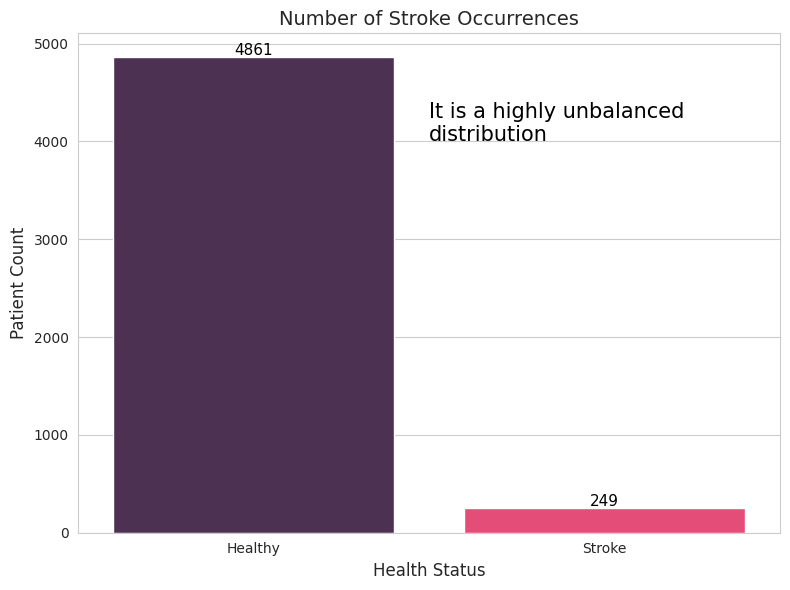

In [ ]:
sns.set_style('whitegrid')
# Create the count plot
ax = sns.countplot(x='stroke', data=df, palette=['#512b58', '#fe346e'])
ax.set_xticklabels(['Healthy', 'Stroke'])
ax.set_title('Number of Stroke Occurrences', fontsize=14)
ax.set_xlabel('Health Status', fontsize=12)
ax.set_ylabel('Patient Count', fontsize=12)
# Annotate the bars with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.text(x=0.5, y=4000, s="It is a highly unbalanced \ndistribution", fontsize=15, color='black')

plt.gcf().set_size_inches(8, 6)
plt.tight_layout()




*   Clearly, the dataset is unbalanced in the favour of healthy.

*   Any dump model should randomly predictions of stroke could reach accuracy of 95%







<Axes: >

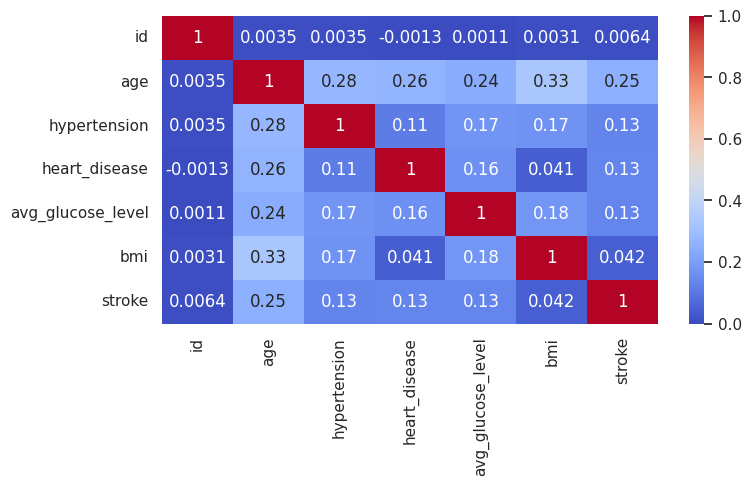

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

sns.heatmap(data = df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')

([<matplotlib.axis.XTick at 0x79b126815810>,
 [Text(0, 0, 'healthy'), Text(1, 0, 'stroke')])

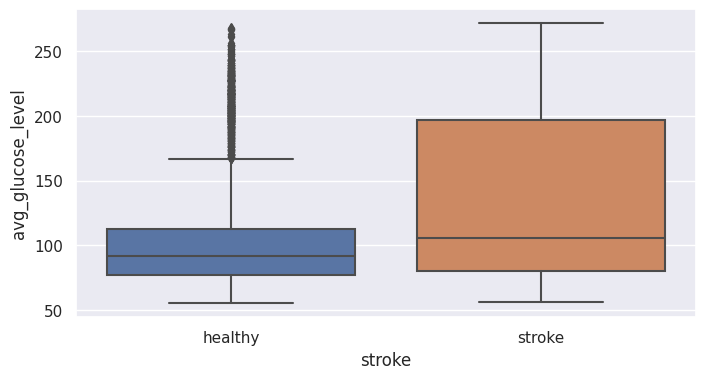

In [ ]:
sns.boxplot(x= 'stroke', y='avg_glucose_level', data=df)
plt.xticks(ticks=[0, 1], labels=['healthy', 'stroke'])


### Feature Engineering:

In [ ]:
df.select_dtypes(['object']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
def dataset_valuecounts(df):
    """
    Provides an overview of the value counts of object type columns
    """


    print(df['gender'].value_counts())
    print("\n" + "-"*50 + "\n")


    print(df['ever_married'].value_counts())
    print("\n" + "-"*50 + "\n")

    print(df['work_type'].value_counts())
    print("\n" + "-"*50 + "\n")

    print(df['Residence_type'].value_counts())
    print("\n" + "-"*50 + "\n")

    print(df['smoking_status'].value_counts())
    print("\n" + "-"*50 + "\n")

dataset_valuecounts(df)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

--------------------------------------------------

Yes    3353
No     1757
Name: ever_married, dtype: int64

--------------------------------------------------

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

--------------------------------------------------

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

--------------------------------------------------

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

--------------------------------------------------



In [ ]:
#drop the single instance of "Other" in the gender column
df = df[df['gender'] != 'Other']

In [ ]:
#One-Hot Encoding
df= pd.get_dummies(df, prefix='ohe', columns=['gender','ever_married' , 'work_type', 'Residence_type','smoking_status'], drop_first=True)


In [ ]:
# handeling missing data
df.isnull().sum()

id                       0
age                      0
hypertension             0
heart_disease            0
avg_glucose_level        0
bmi                    201
stroke                   0
ohe_Male                 0
ohe_Yes                  0
ohe_Never_worked         0
ohe_Private              0
ohe_Self-employed        0
ohe_children             0
ohe_Urban                0
ohe_formerly smoked      0
ohe_never smoked         0
ohe_smokes               0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
cross_val_df, test_df = train_test_split(df, train_size=0.80, test_size=0.20, random_state=42)

# Calculating the median from the training data
bmi_median = cross_val_df['bmi'].median()

# Filling missing values in training data
cross_val_df['bmi'].fillna(bmi_median, inplace=True)

# Filling missing values in test data
test_df['bmi'].fillna(bmi_median, inplace=True)

In [ ]:
def missing(train,test):
    """
    Check for missing data
    """

    print("cross_val_df:")
    print(cross_val_df.isnull().sum())
    print("\n" + "-"*50 + "\n")

    print("test_df:")
    print(test_df.isnull().sum())



missing(cross_val_df,test_df)

cross_val_df:
id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                    0
stroke                 0
ohe_Male               0
ohe_Yes                0
ohe_Never_worked       0
ohe_Private            0
ohe_Self-employed      0
ohe_children           0
ohe_Urban              0
ohe_formerly smoked    0
ohe_never smoked       0
ohe_smokes             0
dtype: int64

--------------------------------------------------

test_df:
id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                    0
stroke                 0
ohe_Male               0
ohe_Yes                0
ohe_Never_worked       0
ohe_Private            0
ohe_Self-employed      0
ohe_children           0
ohe_Urban              0
ohe_formerly smoked    0
ohe_never smoked       0
ohe_smokes             0
dtype: int64


### Train Test Split:


In [ ]:
x_train = cross_val_df.drop(columns=['stroke'])
y_train = cross_val_df['stroke']

x_test = test_df.drop(columns=['stroke'])
y_test = test_df['stroke']

### Normalizing the Data:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

### Balancing the Target Variable

In [ ]:
y_train.value_counts()

0    3900
1     187
Name: stroke, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train_normalized, y_train)


In [ ]:
y_train_smote.value_counts()

0    3900
1    3900
Name: stroke, dtype: int64

### Model #1 Logistic Regression(Base Model):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

def train_and_evaluate_logistic_regression(x_train_norm, y_train, x_train_smote, y_train_smote, x_test_norm, y_test):
    """
    Trains and evaluates a logistic regression model on both normalized and SMOTE data.

    Parameters:
    - x_train_norm: normalized training data
    - y_train: training labels
    - x_train_smote: SMOTE-resampled training data
    - y_train_smote: SMOTE-resampled training labels
    - x_test_norm: normalized test data
    - y_test: test labels

    Returns:
    - None (prints out the evaluation metrics directly)
    """

    # Define parameter grid for logistic regression
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [1000, 2000, 3000]
    }

    # Initialize logistic regression
    logistic_regression = LogisticRegression(max_iter=1000)

    # Grid search for best parameters on normalized data
    grid_search_norm = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy')
    grid_search_norm.fit(x_train_norm, y_train)

    # Evaluate on normalized test data
    y_pred_norm = grid_search_norm.predict(x_test_norm)
    y_pred_proba_norm = grid_search_norm.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on Normalized Data:")
    print("Best Parameters:", grid_search_norm.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_norm))
    print("F1 Score:", f1_score(y_test, y_pred_norm))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_norm))
    print("Classification Report:\n", classification_report(y_test, y_pred_norm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
    print("-" * 50)

    # Grid search for best parameters on SMOTE data
    grid_search_smote = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy')
    grid_search_smote.fit(x_train_smote, y_train_smote)

    # Evaluate on SMOTE test data
    y_pred_smote = grid_search_smote.predict(x_test_norm)
    y_pred_proba_smote = grid_search_smote.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on SMOTE Data:")
    print("Best Parameters:", grid_search_smote.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print("F1 Score:", f1_score(y_test, y_pred_smote))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_smote))
    print("Classification Report:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
    return {
        "norm": {
            "best_params": grid_search_norm.best_params_,
            "y_pred": y_pred_norm,
            "y_pred_proba": y_pred_proba_norm
        },
        "smote": {
            "best_params": grid_search_smote.best_params_,
            "y_pred": y_pred_smote,
            "y_pred_proba": y_pred_proba_smote
        },
        "model_smote": grid_search_smote.best_estimator_
    }


# Usage
logistic_results =train_and_evaluate_logistic_regression(x_train_normalized, y_train, x_train_smote, y_train_smote, x_test_normalized, y_test)
logistic_results

Evaluation on Normalized Data:
Best Parameters: {'C': 1, 'max_iter': 1000, 'solver': 'newton-cg'}
Accuracy: 0.9393346379647749
F1 Score: 0.0
AUC Score: 0.8441364247311829
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation on SMOTE Data:
Best Parameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'liblinear'}
Accuracy: 0.723091976516634
F1 Score: 0.26493506493506497
AUC Score: 0.8459845430107527
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.16      0.82      0.26        62

    accuracy                           0.72      1022
   macro avg       0.57      0.77      0.55      1022
weighted avg       0.93      0.72      0.80      1022

Confusion Matrix:
 [[688 272]
 [ 11  51]]


{'norm': {'best_params': {'C': 1, 'max_iter': 1000, 'solver': 'newton-cg'},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.00495319, 0.00650263, 0.02812032, ..., 0.02260032, 0.05073674,
         0.20031283])},
 'smote': {'best_params': {'C': 0.01, 'max_iter': 1000, 'solver': 'liblinear'},
  'y_pred': array([0, 0, 0, ..., 0, 1, 1]),
  'y_pred_proba': array([0.10592392, 0.1423806 , 0.38833123, ..., 0.3117129 , 0.51863731,
         0.8682254 ])},
 'model_smote': LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')}

### Model #2 Random Forest:

In [ ]:
import warnings


# Temporarily filter out warnings related to undefined metrics
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=Warning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

def train_and_evaluate_random_forest(x_train_norm, y_train, x_train_smote, y_train_smote, x_test_norm, y_test):
    """
    Trains and evaluates a Random Forest model on both normalized and SMOTE data.

    Parameters:
    - x_train_norm: normalized training data
    - y_train: training labels
    - x_train_smote: SMOTE-resampled training data
    - y_train_smote: SMOTE-resampled training labels
    - x_test_norm: normalized test data
    - y_test: test labels

    Returns:
    - None (prints out the evaluation metrics directly)
    """

    # Define parameter grid for Random Forest
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest Classifier
    random_forest = RandomForestClassifier()

    # Grid search for best parameters on normalized data
    grid_search_norm = GridSearchCV(random_forest, param_grid, cv=3, scoring='f1')
    grid_search_norm.fit(x_train_norm, y_train)

    # Evaluate on normalized test data
    y_pred_norm = grid_search_norm.predict(x_test_norm)
    y_pred_proba_norm = grid_search_norm.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on Normalized Data:")
    print("Best Parameters:", grid_search_norm.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_norm))
    print("F1 Score:", f1_score(y_test, y_pred_norm))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_norm))
    print("Classification Report:\n", classification_report(y_test, y_pred_norm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
    print("-" * 50)

    # Grid search for best parameters on SMOTE data
    grid_search_smote = GridSearchCV(random_forest, param_grid, cv=3, scoring='f1')
    grid_search_smote.fit(x_train_smote, y_train_smote)

    # Evaluate on SMOTE test data
    y_pred_smote = grid_search_smote.predict(x_test_norm)
    y_pred_proba_smote = grid_search_smote.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on SMOTE Data:")
    print("Best Parameters:", grid_search_smote.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print("F1 Score:", f1_score(y_test, y_pred_smote))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_smote))
    print("Classification Report:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
    return {
        "norm": {
            "best_params": grid_search_norm.best_params_,
            "y_pred": y_pred_norm,
            "y_pred_proba": y_pred_proba_norm
        },
        "smote": {
            "best_params": grid_search_smote.best_params_,
            "y_pred": y_pred_smote,
            "y_pred_proba": y_pred_proba_smote
        }
    }

# Usage
random_forest_results =train_and_evaluate_random_forest(x_train_normalized, y_train, x_train_smote, y_train_smote, x_test_normalized, y_test)
random_forest_results

Evaluation on Normalized Data:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Accuracy: 0.9393346379647749
F1 Score: 0.03125
AUC Score: 0.8312415994623655
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

Confusion Matrix:
 [[959   1]
 [ 61   1]]
--------------------------------------------------
Evaluation on SMOTE Data:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9090019569471625
F1 Score: 0.0970873786407767
AUC Score: 0.784106182795699
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      

{'norm': {'best_params': {'max_depth': 10,
   'min_samples_leaf': 2,
   'min_samples_split': 5,
   'n_estimators': 10},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.02      , 0.00289017, 0.01730811, ..., 0.01699999, 0.03355662,
         0.18042328])},
 'smote': {'best_params': {'max_depth': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.01, 0.05, 0.08, ..., 0.17, 0.21, 0.36])}}

### Model #3 XGBoost:

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

def train_and_evaluate_xgboost(x_train_norm, y_train, x_train_smote, y_train_smote, x_test_norm, y_test):
    """
    Trains and evaluates an XGBoost model on both normalized and SMOTE data.

    Parameters:
    - x_train_norm: normalized training data
    - y_train: training labels
    - x_train_smote: SMOTE-resampled training data
    - y_train_smote: SMOTE-resampled training labels
    - x_test_norm: normalized test data
    - y_test: test labels

    Returns:
    - None (prints out the evaluation metrics directly)
    """

    # Define parameter grid for XGBoost
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 150],
        'gamma': [0, 0.1, 0.2]
    }

    # Initialize XGBoost Classifier
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Grid search for best parameters on normalized data
    grid_search_norm = GridSearchCV(xgb, param_grid, cv=3, scoring='f1')
    grid_search_norm.fit(x_train_norm, y_train)

    # Evaluate on normalized test data
    y_pred_norm = grid_search_norm.predict(x_test_norm)
    y_pred_proba_norm = grid_search_norm.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on Normalized Data:")
    print("Best Parameters:", grid_search_norm.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_norm))
    print("F1 Score:", f1_score(y_test, y_pred_norm))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_norm))
    print("Classification Report:\n", classification_report(y_test, y_pred_norm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
    print("-" * 50)

    # Grid search for best parameters on SMOTE data
    grid_search_smote = GridSearchCV(xgb, param_grid, cv=3, scoring='f1')
    grid_search_smote.fit(x_train_smote, y_train_smote)

    # Evaluate on SMOTE test data
    y_pred_smote = grid_search_smote.predict(x_test_norm)
    y_pred_proba_smote = grid_search_smote.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on SMOTE Data:")
    print("Best Parameters:", grid_search_smote.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print("F1 Score:", f1_score(y_test, y_pred_smote))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_smote))
    print("Classification Report:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
    return {
        "norm": {
            "best_params": grid_search_norm.best_params_,
            "y_pred": y_pred_norm,
            "y_pred_proba": y_pred_proba_norm
        },
        "smote": {
            "best_params": grid_search_smote.best_params_,
            "y_pred": y_pred_smote,
            "y_pred_proba": y_pred_proba_smote
        }
    }

# Usage
xgboost_results =train_and_evaluate_xgboost(x_train_normalized, y_train, x_train_smote, y_train_smote, x_test_normalized, y_test)
xgboost_results

Evaluation on Normalized Data:
Best Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Accuracy: 0.9324853228962818
F1 Score: 0.07999999999999999
AUC Score: 0.825470430107527
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.23      0.05      0.08        62

    accuracy                           0.93      1022
   macro avg       0.59      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022

Confusion Matrix:
 [[950  10]
 [ 59   3]]
--------------------------------------------------
Evaluation on SMOTE Data:
Best Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
Accuracy: 0.9031311154598826
F1 Score: 0.07476635514018691
AUC Score: 0.775184811827957
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
       

{'norm': {'best_params': {'gamma': 0.1,
   'learning_rate': 0.1,
   'max_depth': 7,
   'n_estimators': 100},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.00054455, 0.00488647, 0.00753556, ..., 0.0179052 , 0.01613371,
         0.11456599], dtype=float32)},
 'smote': {'best_params': {'gamma': 0.2,
   'learning_rate': 0.1,
   'max_depth': 10,
   'n_estimators': 150},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.00058819, 0.00248505, 0.0021864 , ..., 0.05692188, 0.08829058,
         0.4416338 ], dtype=float32)}}

### Model #4 Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

def train_and_evaluate_gradient_boosting(x_train_norm, y_train, x_train_smote, y_train_smote, x_test_norm, y_test):
    """
    Trains and evaluates a Gradient Boosting model on both normalized and SMOTE data.

    Parameters:
    - x_train_norm: normalized training data
    - y_train: training labels
    - x_train_smote: SMOTE-resampled training data
    - y_train_smote: SMOTE-resampled training labels
    - x_test_norm: normalized test data
    - y_test: test labels

    Returns:
    - None (prints out the evaluation metrics directly)
    """

    # Define parameter grid for Gradient Boosting
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    }

    # Initialize Gradient Boosting Classifier
    gbc = GradientBoostingClassifier()

    # Grid search for best parameters on normalized data
    grid_search_norm = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy')
    grid_search_norm.fit(x_train_norm, y_train)

    # Evaluate on normalized test data
    y_pred_norm = grid_search_norm.predict(x_test_norm)
    y_pred_proba_norm = grid_search_norm.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on Normalized Data:")
    print("Best Parameters:", grid_search_norm.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_norm))
    print("F1 Score:", f1_score(y_test, y_pred_norm))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_norm))
    print("Classification Report:\n", classification_report(y_test, y_pred_norm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
    print("-" * 50)

    # Grid search for best parameters on SMOTE data
    grid_search_smote = GridSearchCV(gbc, param_grid, cv=3, scoring='accuracy')
    grid_search_smote.fit(x_train_smote, y_train_smote)

    # Evaluate on SMOTE test data
    y_pred_smote = grid_search_smote.predict(x_test_norm)
    y_pred_proba_smote = grid_search_smote.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on SMOTE Data:")
    print("Best Parameters:", grid_search_smote.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print("F1 Score:", f1_score(y_test, y_pred_smote))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_smote))
    print("Classification Report:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
    return {
        "norm": {
            "best_params": grid_search_norm.best_params_,
            "y_pred": y_pred_norm,
            "y_pred_proba": y_pred_proba_norm
        },
        "smote": {
            "best_params": grid_search_smote.best_params_,
            "y_pred": y_pred_smote,
            "y_pred_proba": y_pred_proba_smote
        }
    }

# Usage
gradient_boosting_results = train_and_evaluate_gradient_boosting(x_train_normalized, y_train, x_train_smote, y_train_smote, x_test_normalized, y_test)
gradient_boosting_results

Evaluation on Normalized Data:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9393346379647749
F1 Score: 0.0
AUC Score: 0.8269069220430109
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation on SMOTE Data:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9295499021526419
F1 Score: 0.12195121951219512
AUC Score: 0.7678931451612903
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.25      0.08      0.12        62

    accuracy                           0.93      1022
   macro avg       0.60      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022

Confusion Matrix:
 [[945  15]
 [ 57   5]]


{'norm': {'best_params': {'learning_rate': 0.01,
   'max_depth': 3,
   'min_samples_leaf': 3,
   'min_samples_split': 2,
   'n_estimators': 100},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.02029472, 0.02029472, 0.03407413, ..., 0.03076636, 0.05410457,
         0.12994366])},
 'smote': {'best_params': {'learning_rate': 0.2,
   'max_depth': 7,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 300},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([3.49421363e-06, 1.29059225e-05, 1.87886183e-05, ...,
         2.28592577e-03, 3.48074686e-04, 6.66452941e-02])}}

### Model #5 LightGBM:

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

def train_and_evaluate_lightgbm(x_train_norm, y_train, x_train_smote, y_train_smote, x_test_norm, y_test):
    """
    Trains and evaluates a LightGBM model on both normalized and SMOTE data.

    Parameters:
    - x_train_norm: normalized training data
    - y_train: training labels
    - x_train_smote: SMOTE-resampled training data
    - y_train_smote: SMOTE-resampled training labels
    - x_test_norm: normalized test data
    - y_test: test labels

    Returns:
    - None (prints out the evaluation metrics directly)
    """

    # Define parameter grid for LightGBM
    param_grid = {
        'num_leaves': [20, 30, 40],
    'min_data_in_leaf': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_gain_to_split': [0.001, 0.01]
    }

    # Initialize LightGBM Classifier
    lgbm = lgb.LGBMClassifier(verbosity=-1)

    # Grid search for best parameters on normalized data
    grid_search_norm = GridSearchCV(lgbm, param_grid, cv=3, scoring='accuracy')
    grid_search_norm.fit(x_train_norm, y_train)

    # Evaluate on normalized test data
    y_pred_norm = grid_search_norm.predict(x_test_norm)
    y_pred_proba_norm = grid_search_norm.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on Normalized Data:")
    print("Best Parameters:", grid_search_norm.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_norm))
    print("F1 Score:", f1_score(y_test, y_pred_norm))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_norm))
    print("Classification Report:\n", classification_report(y_test, y_pred_norm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_norm))
    print("-" * 50)

    # Grid search for best parameters on SMOTE data
    grid_search_smote = GridSearchCV(lgbm, param_grid, cv=3, scoring='accuracy')
    grid_search_smote.fit(x_train_smote, y_train_smote)

    # Evaluate on SMOTE test data
    y_pred_smote = grid_search_smote.predict(x_test_norm)
    y_pred_proba_smote = grid_search_smote.predict_proba(x_test_norm)[:, 1]
    print("Evaluation on SMOTE Data:")
    print("Best Parameters:", grid_search_smote.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_smote))
    print("F1 Score:", f1_score(y_test, y_pred_smote))
    print("AUC Score:", roc_auc_score(y_test, y_pred_proba_smote))
    print("Classification Report:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))

    return {
        "norm": {
            "best_params": grid_search_norm.best_params_,
            "y_pred": y_pred_norm,
            "y_pred_proba": y_pred_proba_norm
        },
        "smote": {
            "best_params": grid_search_smote.best_params_,
            "y_pred": y_pred_smote,
            "y_pred_proba": y_pred_proba_smote
        }
    }

# Usage
lightgbm_results = train_and_evaluate_lightgbm(x_train_normalized, y_train, x_train_smote, y_train_smote, x_test_normalized, y_test)
lightgbm_results

Evaluation on Normalized Data:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_data_in_leaf': 20, 'min_gain_to_split': 0.001, 'n_estimators': 300, 'num_leaves': 30}
Accuracy: 0.9393346379647749
F1 Score: 0.0
AUC Score: 0.8430779569892474
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation on SMOTE Data:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_data_in_leaf': 20, 'min_gain_to_split': 0.001, 'n_estimators': 300, 'num_leaves': 40}
Accuracy: 0.923679060665362
F1 Score: 0.11363636363636363
AUC Score: 0.7821404569892474
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.19      0.08      0.11        62

    accuracy                           0.92      1022
   macro avg       0.57      0.53      0.54      1022
weighted avg       0.90      0.92      0.91      1022

Confusion Matrix:
 [[939  21]
 [ 57   5]]


{'norm': {'best_params': {'learning_rate': 0.01,
   'max_depth': 5,
   'min_data_in_leaf': 20,
   'min_gain_to_split': 0.001,
   'n_estimators': 300,
   'num_leaves': 30},
  'y_pred': array([0, 0, 0, ..., 0, 0, 0]),
  'y_pred_proba': array([0.00381686, 0.00765615, 0.05572065, ..., 0.04126739, 0.04779152,
         0.22227411])},
 'smote': {'best_params': {'learning_rate': 0.05,
   'max_depth': 10,
   'min_data_in_leaf': 20,
   'min_gain_to_split': 0.001,
   'n_estimators': 300,
   'num_leaves': 40},
  'y_pred': array([0, 0, 0, ..., 0, 0, 1]),
  'y_pred_proba': array([4.07708738e-05, 3.31673520e-03, 6.59957151e-03, ...,
         1.52426062e-01, 1.69765435e-02, 5.86040077e-01])}}

### Compare Model Performance

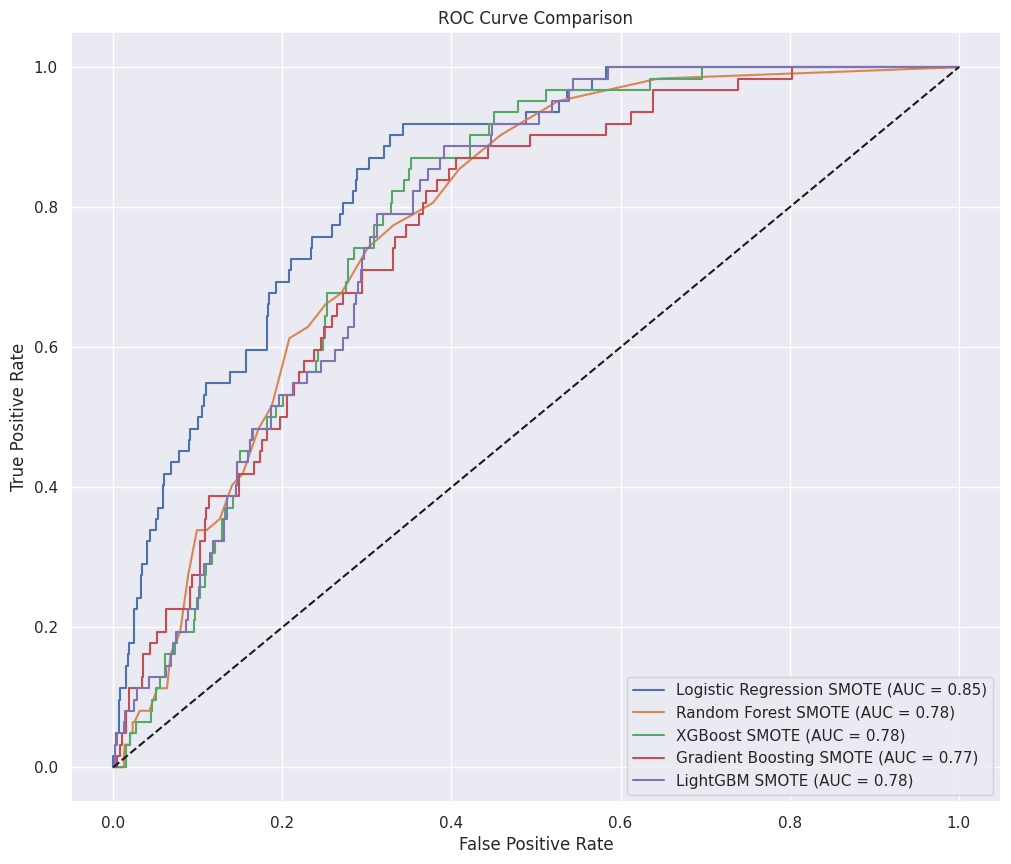

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 10))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logistic_results["smote"]["y_pred_proba"])
plt.plot(fpr, tpr, label=f'Logistic Regression SMOTE (AUC = {auc(fpr, tpr):.2f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, random_forest_results["smote"]["y_pred_proba"])
plt.plot(fpr, tpr, label=f'Random Forest SMOTE (AUC = {auc(fpr, tpr):.2f})')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, xgboost_results["smote"]["y_pred_proba"])
plt.plot(fpr, tpr, label=f'XGBoost SMOTE (AUC = {auc(fpr, tpr):.2f})')

# Gradient Boosting
fpr, tpr, _ = roc_curve(y_test, gradient_boosting_results["smote"]["y_pred_proba"])
plt.plot(fpr, tpr, label=f'Gradient Boosting SMOTE (AUC = {auc(fpr, tpr):.2f})')

# LightGBM
fpr, tpr, _ = roc_curve(y_test, lightgbm_results["smote"]["y_pred_proba"])
plt.plot(fpr, tpr, label=f'LightGBM SMOTE (AUC = {auc(fpr, tpr):.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")



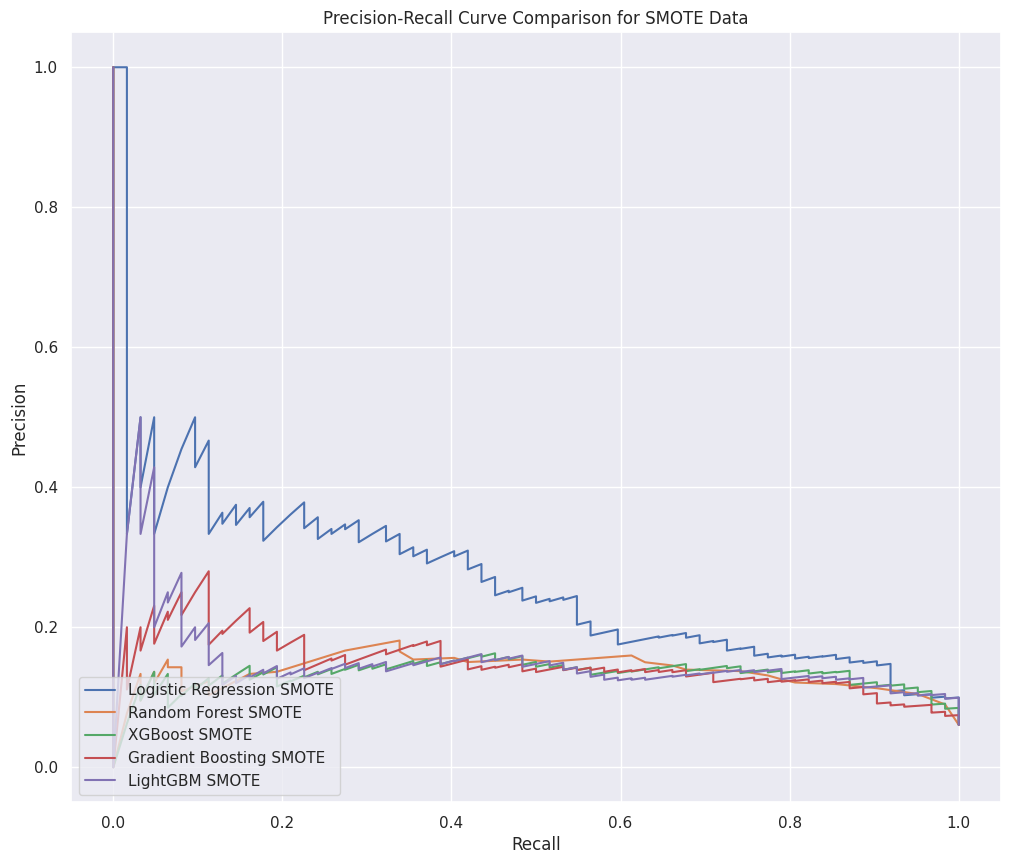

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, logistic_results["smote"]["y_pred_proba"])
plt.plot(recall, precision, label='Logistic Regression SMOTE')

# Random Forest
precision, recall, _ = precision_recall_curve(y_test, random_forest_results["smote"]["y_pred_proba"])
plt.plot(recall, precision, label='Random Forest SMOTE')

# XGBoost
precision, recall, _ = precision_recall_curve(y_test, xgboost_results["smote"]["y_pred_proba"])
plt.plot(recall, precision, label='XGBoost SMOTE')

# Gradient Boosting
precision, recall, _ = precision_recall_curve(y_test, gradient_boosting_results["smote"]["y_pred_proba"])
plt.plot(recall, precision, label='Gradient Boosting SMOTE')

# LightGBM
precision, recall, _ = precision_recall_curve(y_test, lightgbm_results["smote"]["y_pred_proba"])
plt.plot(recall, precision, label='LightGBM SMOTE')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for SMOTE Data')
plt.legend(loc="lower left")
plt.show()


### Save the Best Model

In [ ]:
from joblib import dump
dump(logistic_results["model_smote"], 'logistic_regression_model_smote.joblib')

['logistic_regression_model_smote.joblib']

# Summary


1.   Visulaization of few relationships
2.   Feature Engineering
1.   Normalizing the Data

1.   Balancing the Target Variable
2.   Implemented few models

2.   **Logistic Regression on SMOTE data**  stands out with the highest F1 score (0.264) for stroke predictions. This indicates a better balance between precision and recall for the minority class compared to other models, despite a decrease in overall accuracy.

